# Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,NaN,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Histogram Plot of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B4D1EC8>,
      dtype=object)

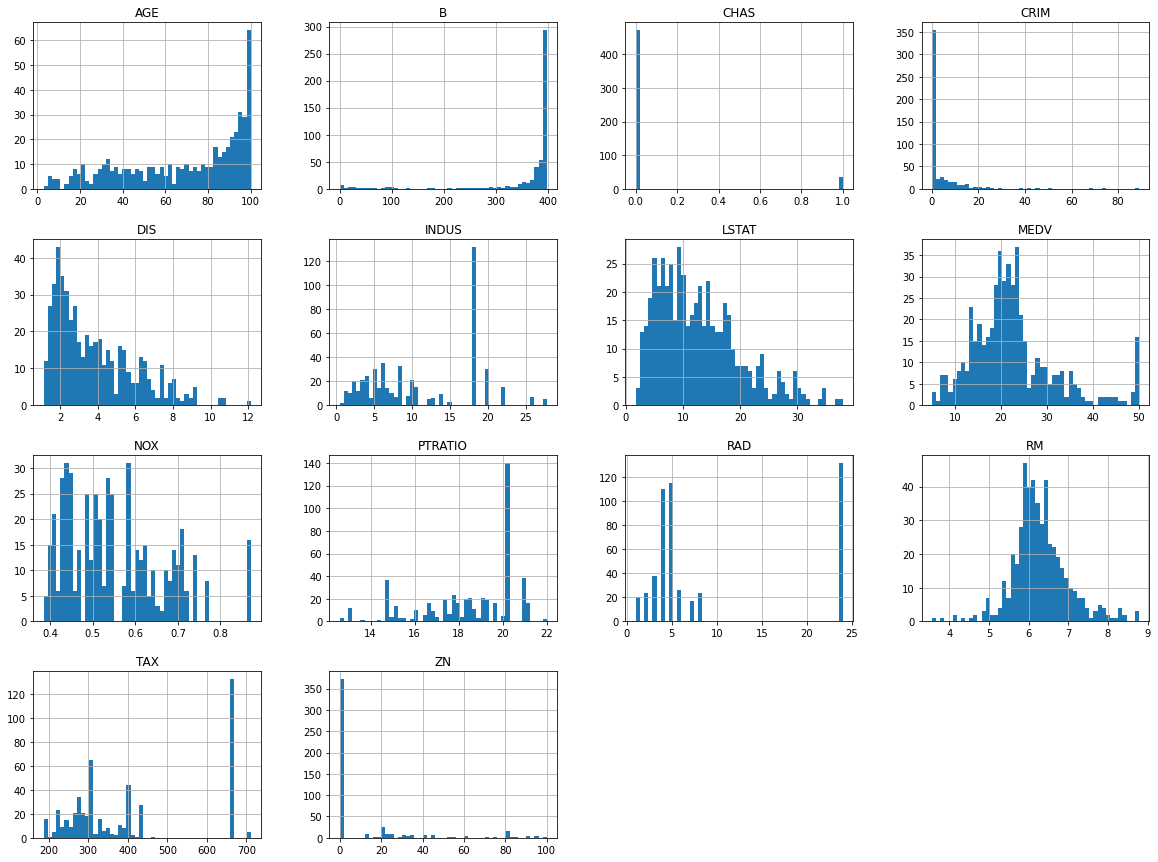

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

## Train_Test Splitting

In [5]:
# For Learning Purpose
# import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]
    

In [6]:
# train_set,test_set=split_train_test(housing,0.2)

## SKLearn Function for Train_Test Split

In [7]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]    

In [18]:
housing = strat_train_set.copy

## Looking For Correlations

In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

AttributeError: 'function' object has no attribute 'corr'

In [17]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

TypeError: 'method' object is not subscriptable

In [ ]:
housing.plot(kind="scatter", x = "RM", y="MEDV", alpha=0.8)

## Trying out Attributes combinations

In [ ]:
housing["TAXRM"] = housing['TAX']/housing["RM"]

In [ ]:
housing.head()

In [ ]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

In [ ]:
 housing.plot(kind="scatter", x = "TAXRM", y="MEDV", alpha=0.8)

## Missing Attributes

In [ ]:
housing.describe()  #RM count is 601 because of missing values

To take care of missing attributes, you have three optoins:
1. Get rid of the missing data points
2. Get rid of the whole attribute
3. Set the value to some value (0,mean or median)

In [ ]:
# Option 1:
housing.dropna(subset=["RM"]).shape

In [ ]:
# Option 2:
housing.drop("RM",axis=1).shape

In [ ]:
# Option 3:
median = housing["RM"].median()
housing["RM"].fillna(median).shape

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

In [ ]:
imputer.statistics_

In [ ]:
X=imputer.transform(housing)

In [ ]:
housing_tr = pd.DataFrame(X,columns=housing.columns)

In [ ]:
housing_tr.describe()  #RM count will become 506

## Scikit-Learn

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg: Imputer
It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and return output based on the learnings from fit().
It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. Fit() and predict() are two common functions.
It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature  scaling methods:
1. Min-max scaling (Normaization)
   (value-min)/(max-min)
    Sklearn provide a class called MinMaxScaler for this
    
2. Standardization
    (value-mean)/std
    Sklearn provides a class called Standard Scaler for this

## Creating Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
